In [7]:
import environment
from environment import MDPEnv, config
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import PPO

In [8]:
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
from stable_baselines3.common.utils import obs_as_tensor

In [9]:
MimicEnv = MDPEnv(config)
MimicEnv = Monitor(MimicEnv, filename='ppo_rewards.csv', allow_early_resets=False)
model = PPO("MlpPolicy", MimicEnv, verbose=1, tensorboard_log="OG_PPO_1", n_epochs=100, batch_size = 100, learning_rate = 0.003)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [10]:
model.learn(total_timesteps=100000)

Logging to OG_PPO_1/PPO_2
-----------------------------
| time/              |      |
|    fps             | 5215 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1414        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013903551 |
|    clip_fraction        | 0.197       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.000116    |
|    learning_rate        | 0.003       |
|    loss                 | 2.83e+03    |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 1.91e+04    |
-----------------------------------------
--------

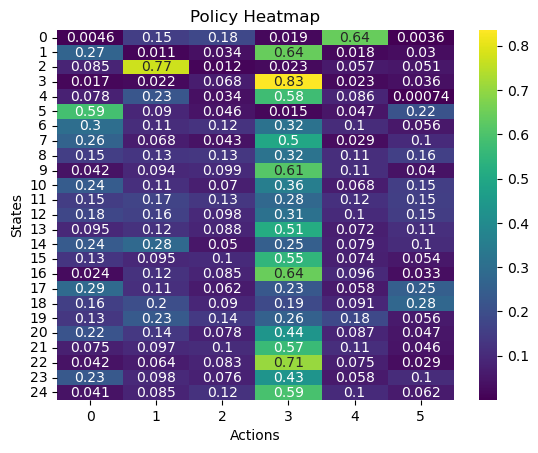

In [11]:
def predict_proba(model, state):
    obs = obs_as_tensor(state, model.policy.device)
    dis = model.policy.get_distribution(obs)
    probs = dis.distribution.probs
    probs_np = probs.detach().numpy()
    return probs_np
# prob = predict_proba(model, np.asarray([12, 13]))
prob = predict_proba(model, np.arange(0,25))

sns.heatmap(prob,  annot=True, cmap="viridis", cbar=True)
# plt.imshow(prob)

plt.xlabel('Actions')
plt.ylabel('States')
plt.title('Policy Heatmap')
plt.savefig('policy_heatmap.png', dpi=400)

plt.show()
# print(f"Mean Reward: {mean_reward}")